In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_ori=pd.read_csv("Country-data.csv")
df=data_ori.copy()
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Data Visualization

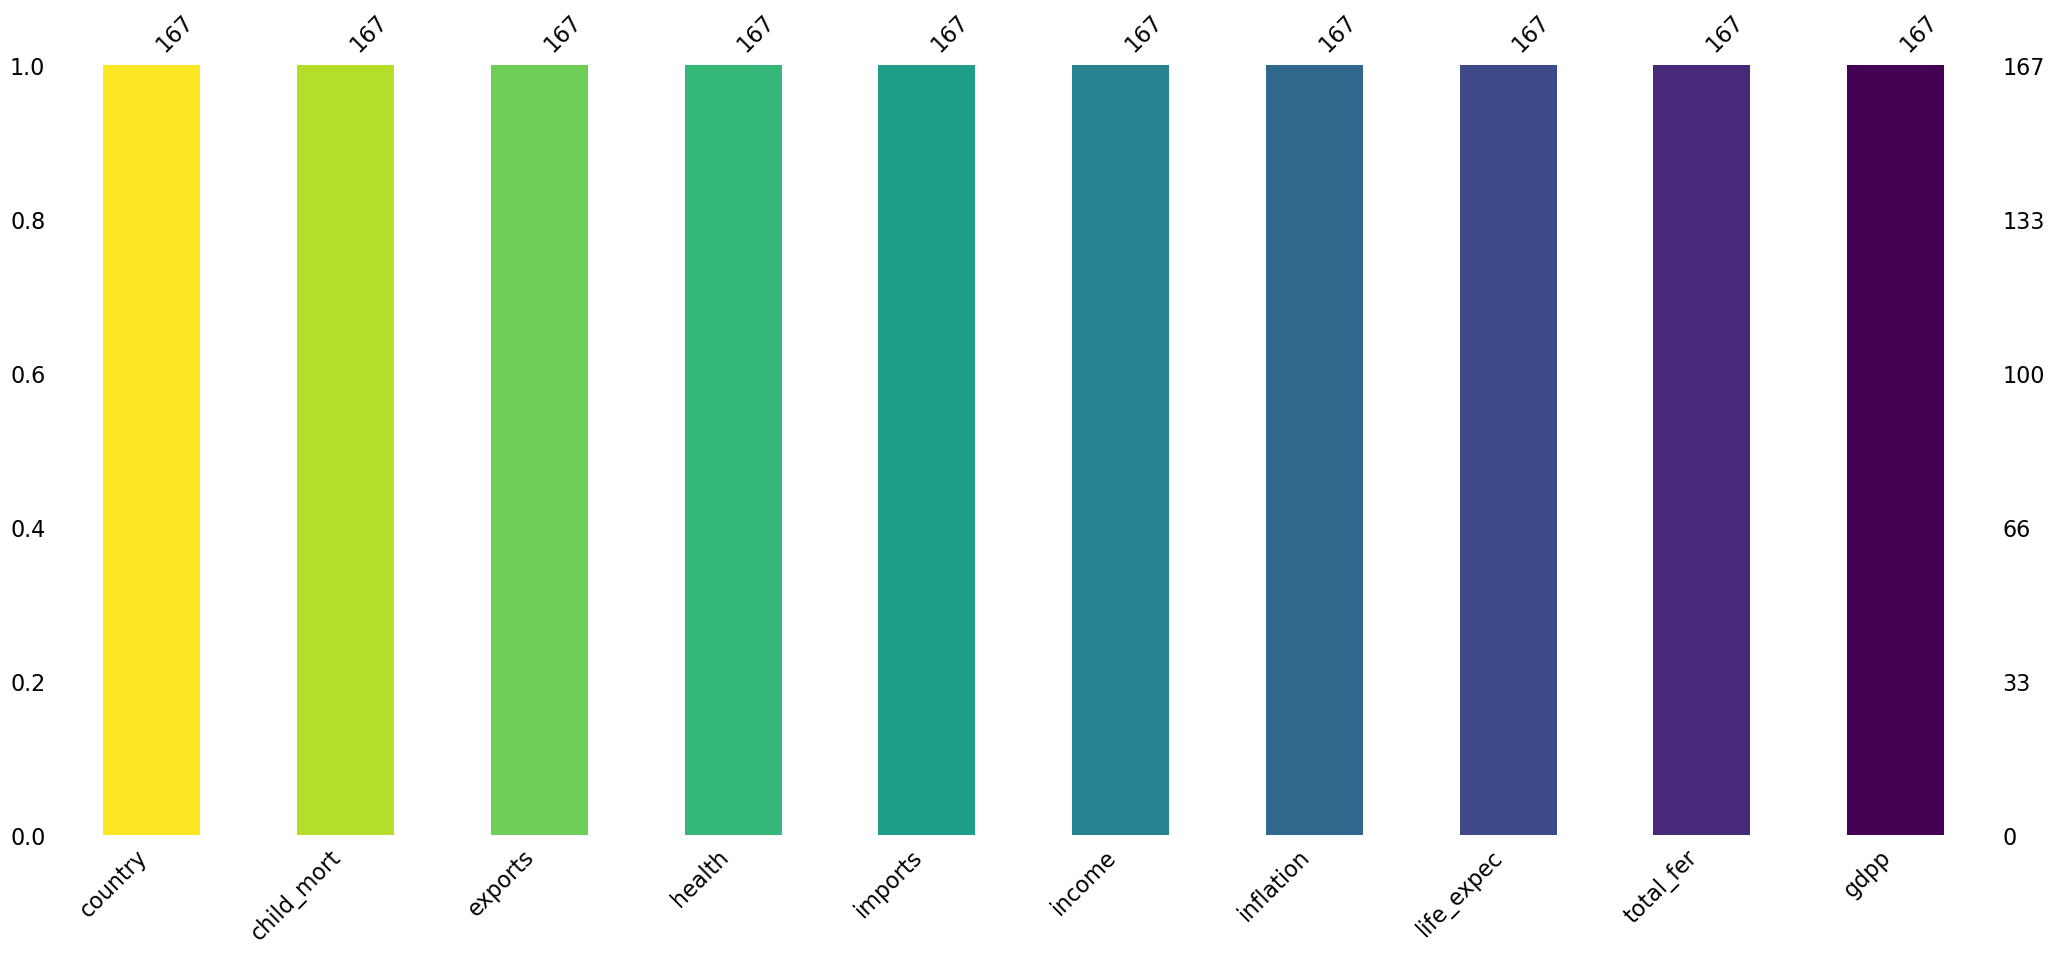

In [6]:
## illustrate missing data by bar chart

import missingno as msno
num_columns=len(df.columns)
colors=plt.cm.viridis(np.linspace(1,0,num_columns))
msno.bar(df,color=colors)
plt.show()

### Select 10 random countries for data analysis

In [7]:

selected_country=pd.Series(df["country"]).sample(10,random_state=42)

filtered_df=df[df["country"].isin(selected_country)]


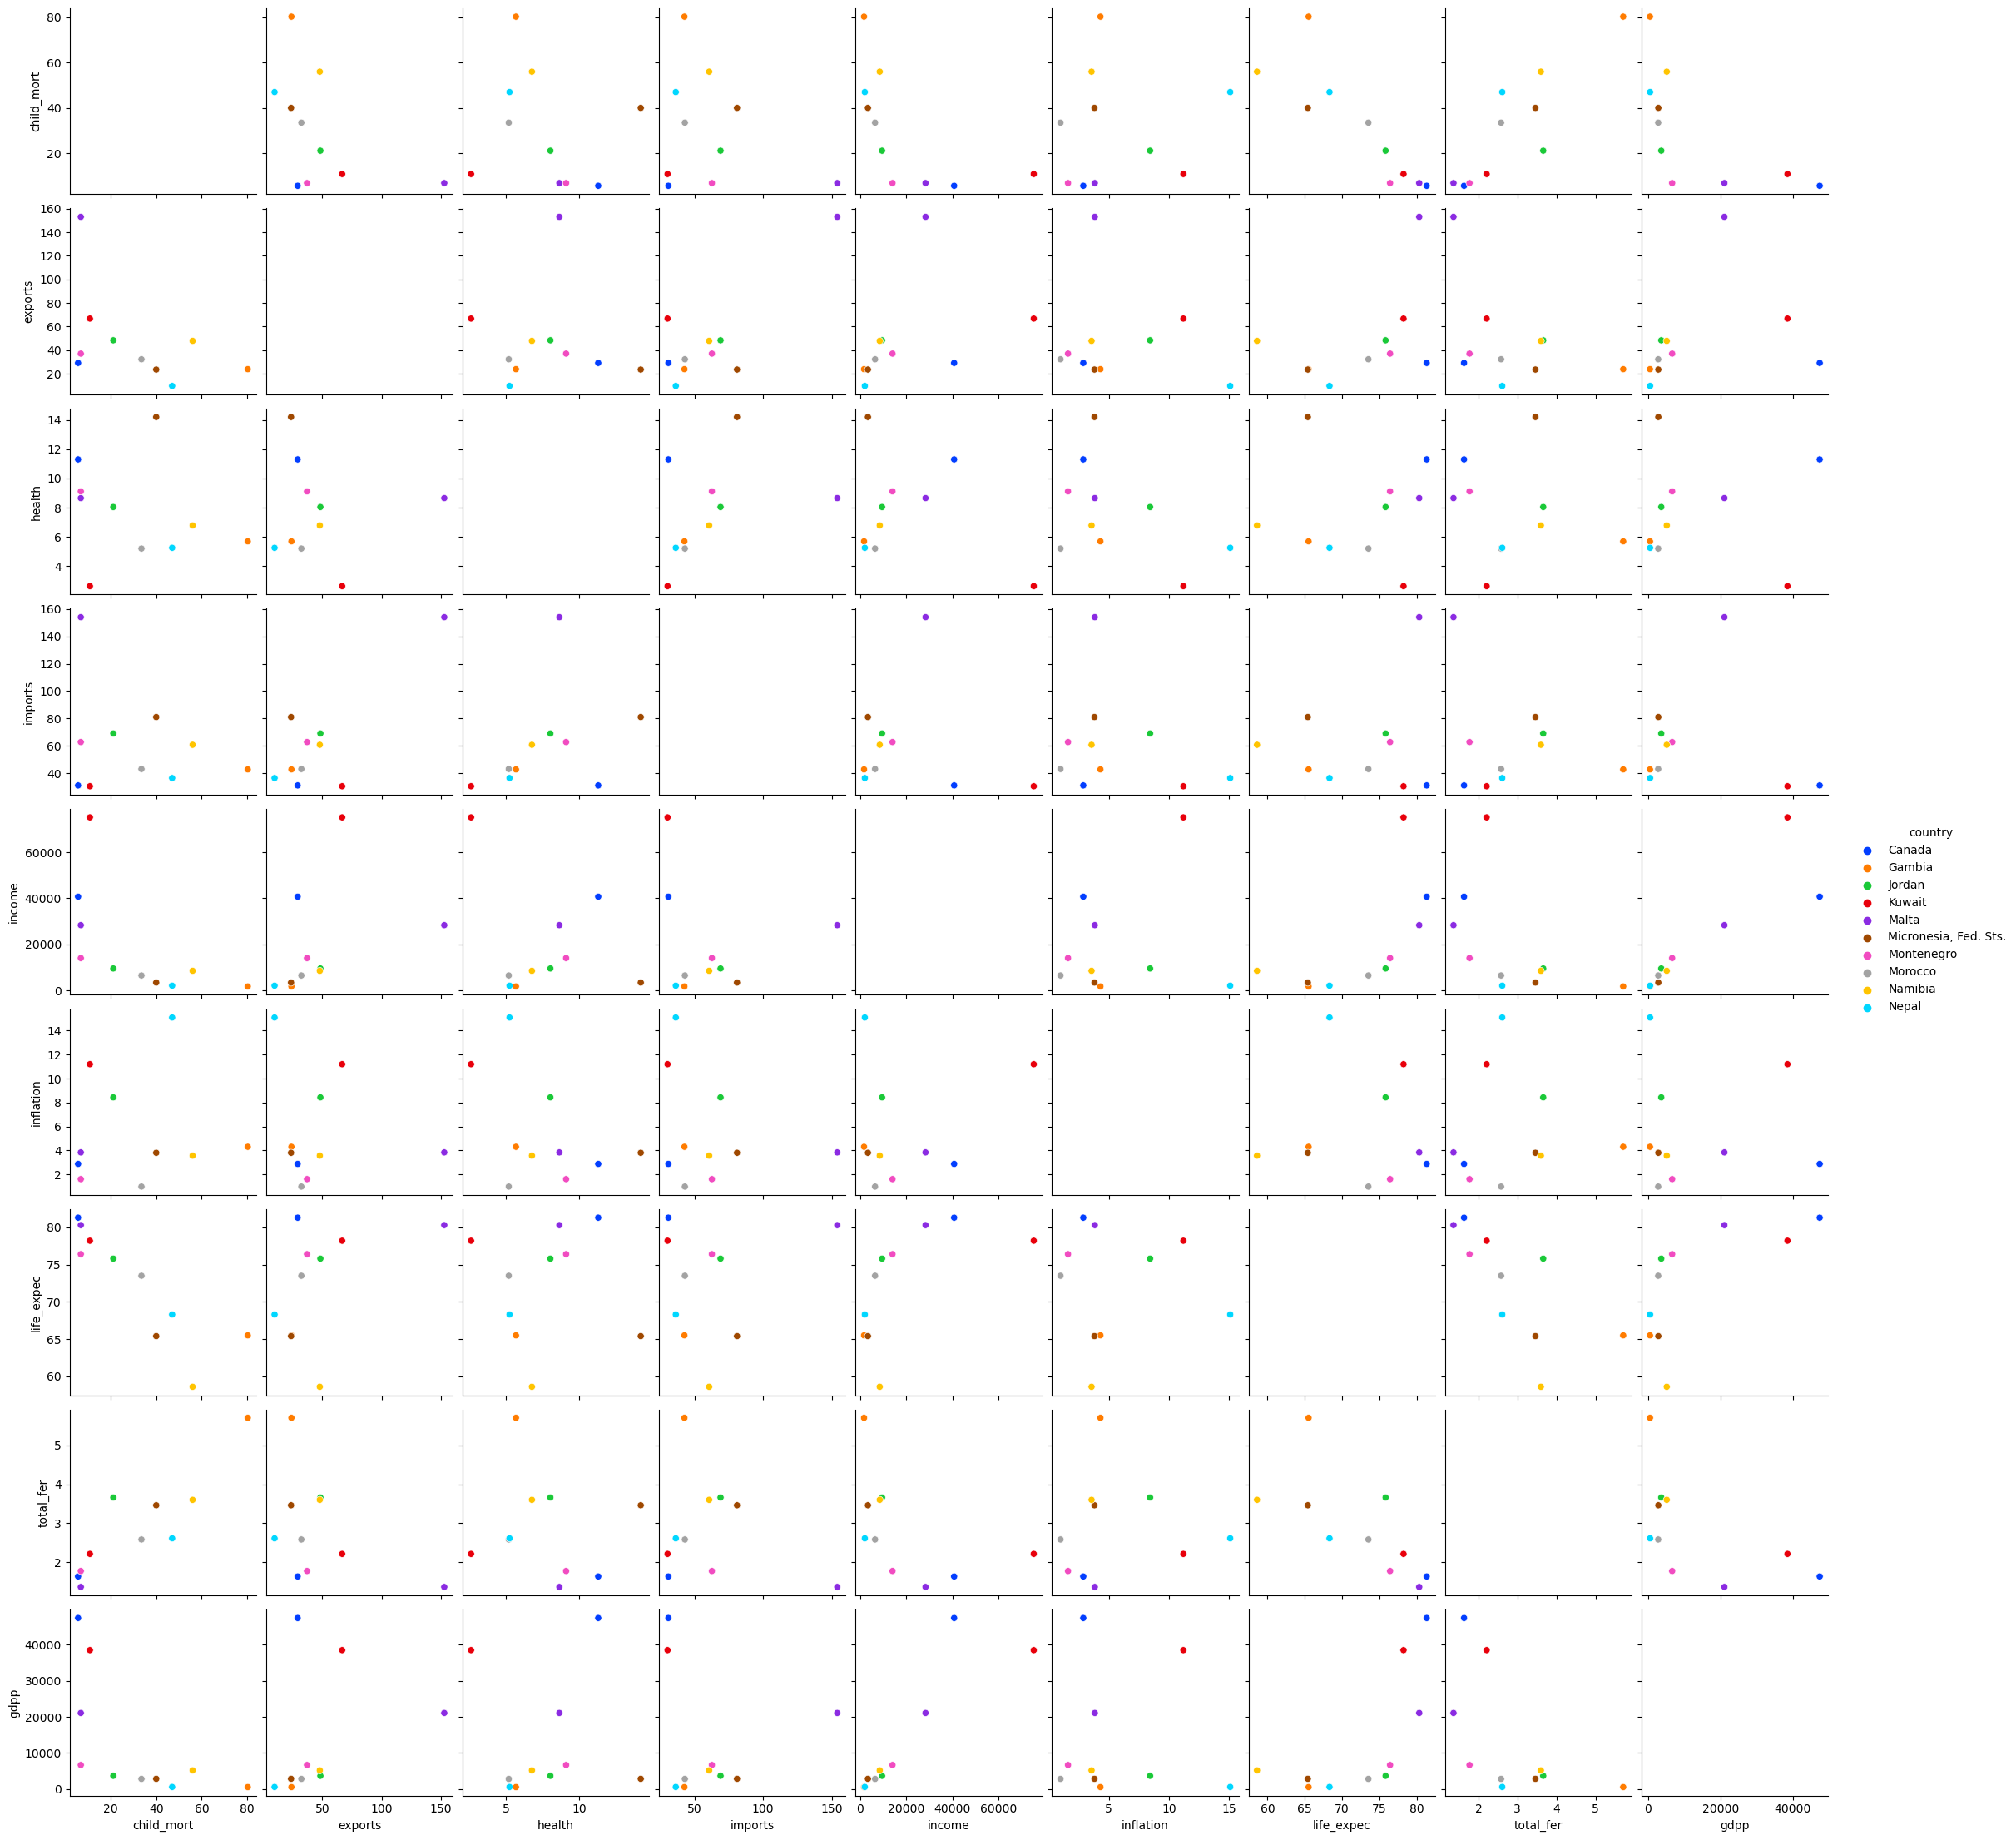

In [8]:
sns.pairplot(data=filtered_df,hue="country",palette="bright")
plt.show()

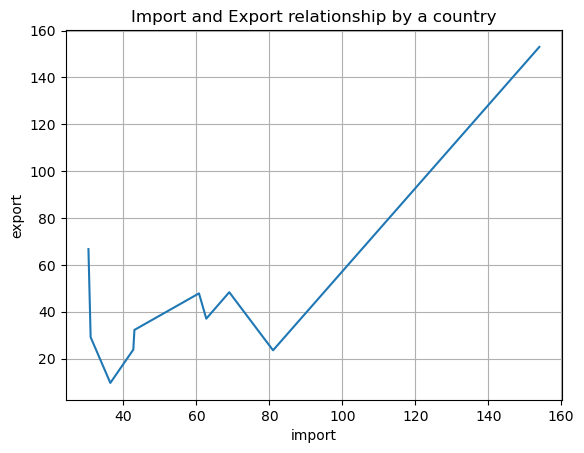

In [9]:

sns.lineplot(data=filtered_df,x="imports",y="exports")
plt.title("Import and Export relationship by a country")
plt.xlabel("import")
plt.ylabel("export")
plt.grid(True)
plt.show()

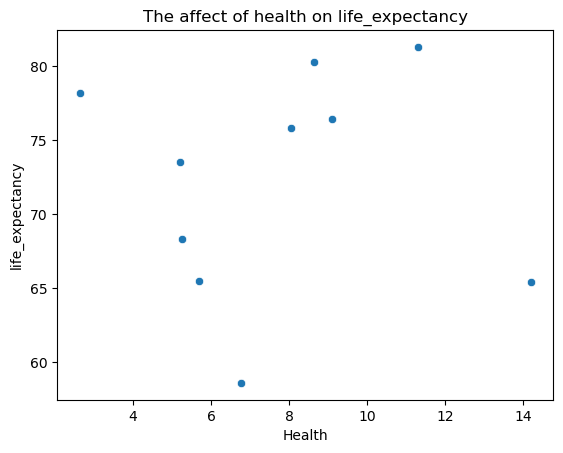

In [10]:
sns.scatterplot(data=filtered_df,x="health",y="life_expec")
plt.title("The affect of health on life_expectancy")
plt.xlabel("Health")
plt.ylabel("life_expectancy")
plt.show()

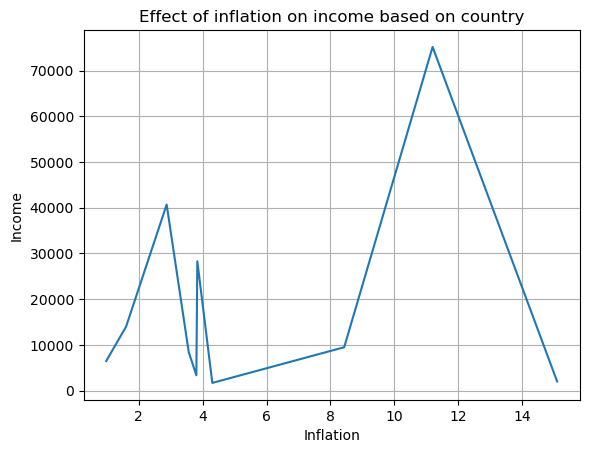

In [11]:
sns.lineplot(data=filtered_df,x="inflation",y="income",palette='dark')
plt.title("Effect of inflation on income based on country")
plt.xlabel("Inflation")
plt.ylabel("Income")
plt.grid(True)
plt.show()

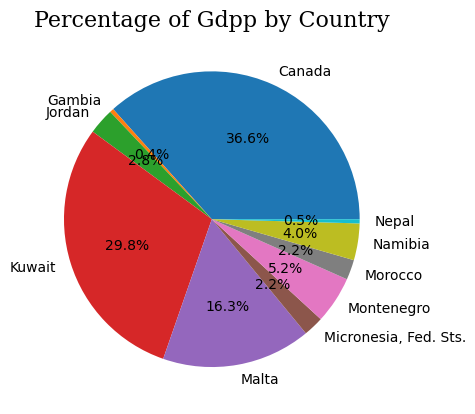

In [12]:
plt.pie(x=filtered_df["gdpp"],labels=filtered_df["country"],autopct='%1.1f%%')
plt.title("Percentage of Gdpp by Country",fontsize=16,fontname="serif")
plt.show()

### Check an outlier datavalue 

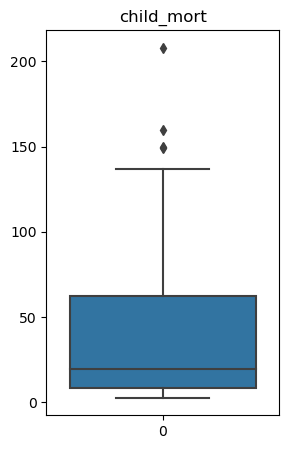

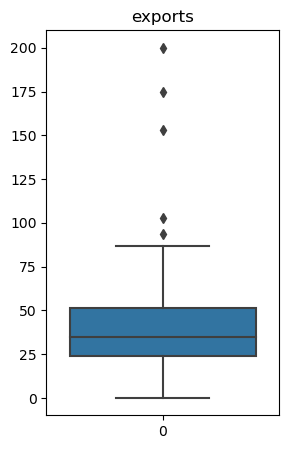

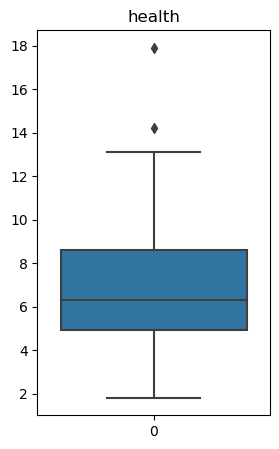

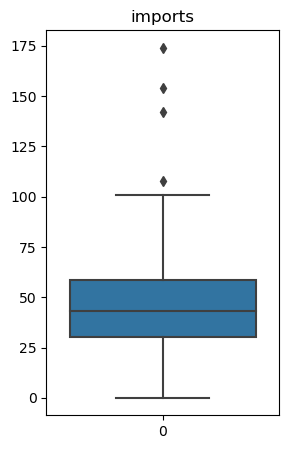

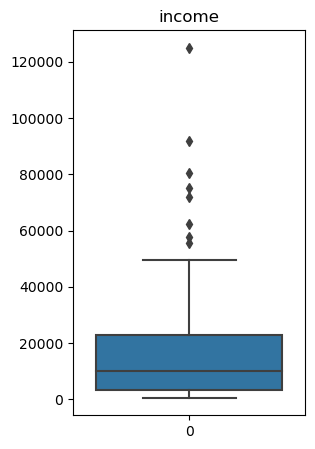

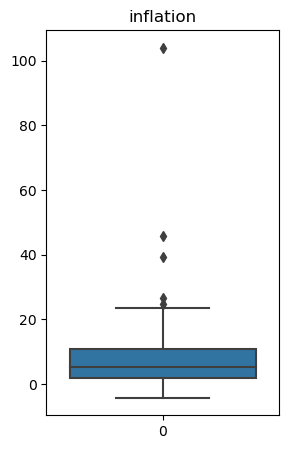

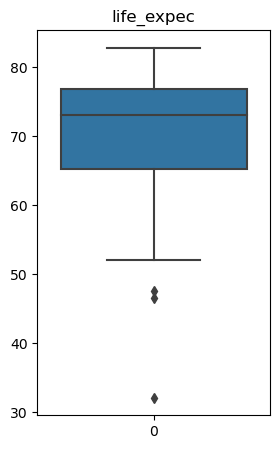

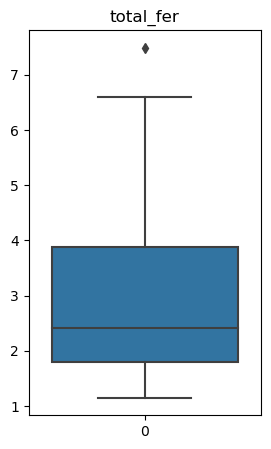

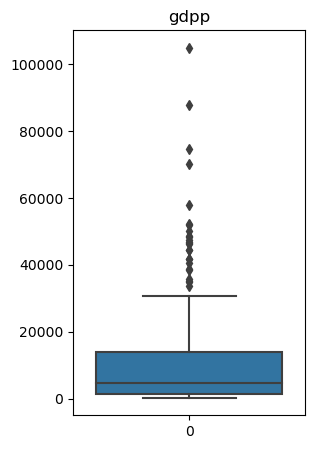

In [13]:
column=df.columns[1:]
column

for x in column:
    plt.figure(figsize=(3,5))
    sns.boxplot(data=df[x])
    plt.title(f"{x}")
    


    

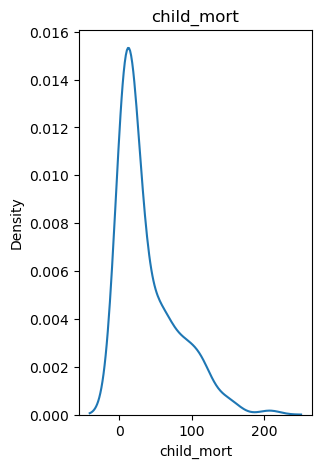

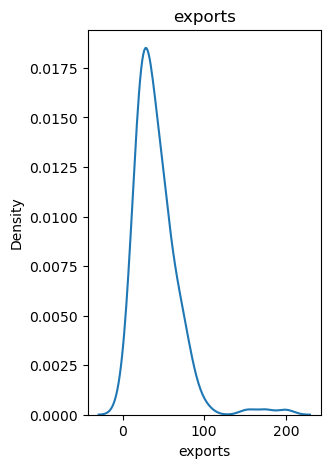

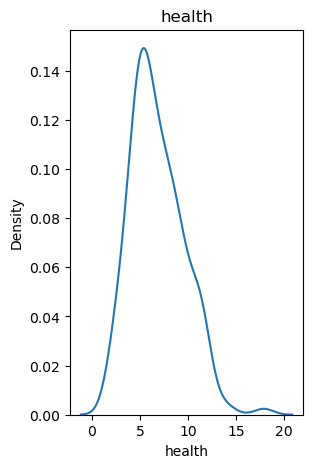

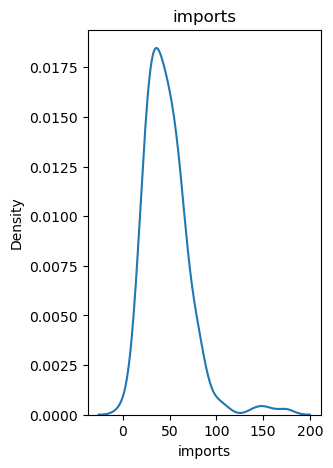

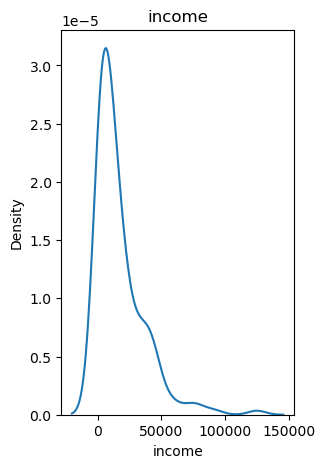

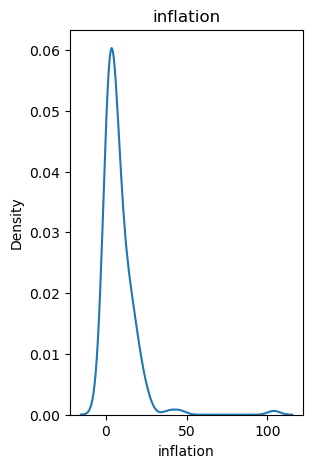

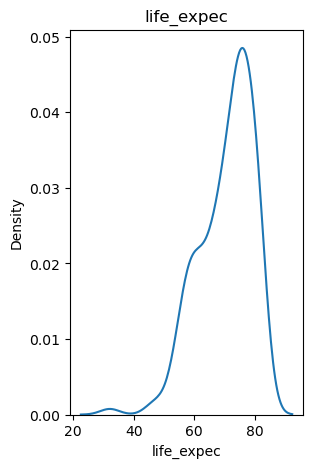

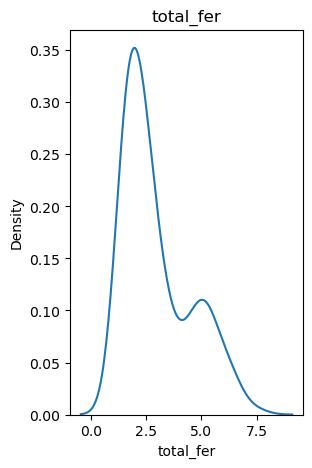

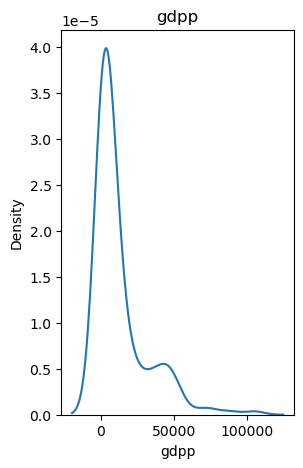

In [14]:
column=df.columns[1:]
column

for x in column:
    plt.figure(figsize=(3,5))
    sns.kdeplot(data=df[x])
    plt.title(f"{x}")

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler






In [16]:
df=df.drop("country",axis=1)

In [17]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [18]:
sc=StandardScaler()

In [19]:
df_scale=sc.fit_transform(df)

In [20]:
new_df=pd.DataFrame(df_scale,columns=df.columns)

In [21]:
new_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [22]:
### plot a optimum number of cluster
def optimum (max_k):
    kmeans=KMeans(n_clusters=max_k)
    kmeans.fit(new_df)
    return kmeans.inertia_

inertia=[]

for i in range (1,10):
    inertia.append(optimum(i))

In [23]:
print(inertia)

[1503.0000000000002, 1050.2145582853304, 831.4244352086873, 782.9867911890162, 634.5768577581769, 572.0244393833162, 540.922945271233, 467.148714731605, 431.12417371784954]


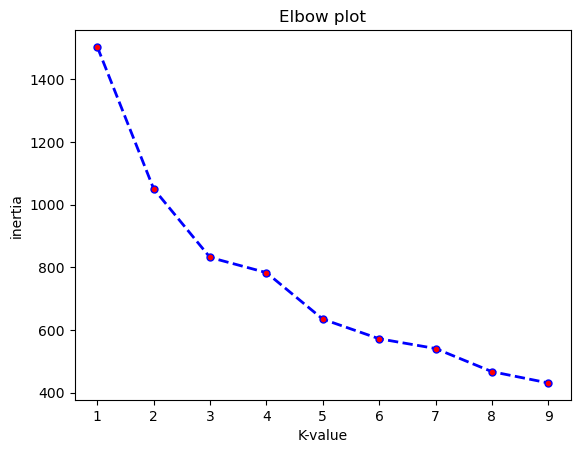

In [31]:
### generate elbow plot

plt.plot(range(1,10),inertia,linestyle="dashed",color="blue",marker="o",markersize=5,linewidth=2,mfc="red")
plt.title("Elbow plot")
plt.xlabel("K-value")
plt.ylabel("inertia")
plt.show()

In [25]:
# Train a model again by choose K=5
kmeans=KMeans(n_clusters=5)
kmeans.fit(new_df)

KMeans(n_clusters=5)

In [26]:
print(kmeans.labels_)

[2 3 0 2 3 0 0 1 1 0 3 3 0 3 3 1 3 2 3 0 3 2 0 4 3 2 2 3 2 1 3 2 2 0 0 0 2
 2 2 3 2 3 3 3 1 0 0 0 3 2 2 3 3 1 1 2 2 3 1 2 1 3 0 2 2 3 2 3 1 0 0 0 0 4
 1 1 0 1 3 0 2 2 4 3 2 3 3 2 2 0 3 4 3 2 2 3 3 2 4 2 3 3 3 0 3 0 2 0 2 0 1
 1 2 2 1 0 2 3 3 0 0 3 1 4 0 0 2 3 0 2 3 3 2 4 3 3 3 2 3 1 0 3 2 3 1 1 0 2
 3 2 2 0 3 0 3 2 3 4 1 1 0 0 3 0 3 2 2]


In [27]:
data_ori["Label"]=kmeans.labels_

In [28]:
data_ori

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


### Plotting result

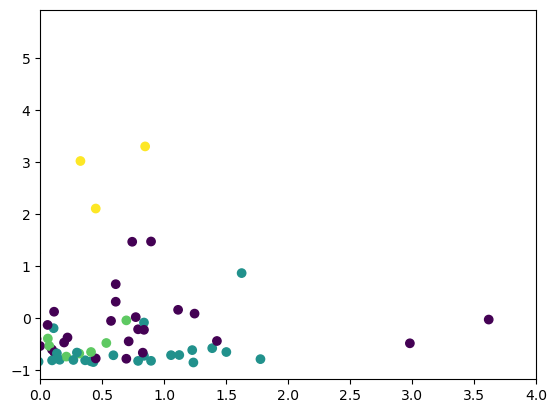

In [30]:
plt.scatter(new_df["inflation"],new_df["income"],c=kmeans.labels_)
plt.xlim(0,4)
plt.show()
